# CLTV - Müşteri Yaşam Boyu Değeri

* CLTV = (Customer Value / Churn Rate) x Profit Margin

In [1]:
import pandas as pd
data = pd.read_excel("online_retail_II.xlsx",
                    sheet_name="Year 2010-2011",
                    parse_dates=["InvoiceDate"])
df = data.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [2]:
###Veriyi hazırlama###

# Iade faturaları cıkarma
df = df[~df["Invoice"].str.contains("C", na=False)]
df = df[(df["Quantity"] > 0)]
df.dropna(inplace=True)
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [4]:
df_cltv = df.groupby("Customer ID").agg({"Invoice": lambda x: len(x),
                                        "Quantity": lambda x: x.sum(),
                                        "TotalPrice": lambda x: x.sum()})
# total_transaction = işlem sayısı
# total_unit = işlemlerde toplam kaç birim satın alma yaptı
# total_price = işlemlerde bıraktığı gelir
df_cltv.columns = ["total_transaction", "total_unit", "total_price"]
df_cltv.head(10)

,total_transaction,total_unit,total_price
Customer ID,,,
12346.0,1,74215,77183.60
12347.0,182,2458,4310.00
12348.0,31,2341,1797.24
12349.0,73,631,1757.55
12350.0,17,197,334.40
12352.0,85,536,2506.04
12353.0,4,20,89.00
12354.0,58,530,1079.40
12355.0,13,240,459.40


In [11]:
# Average Order Value = Total_Revenue / Total_Number_of_Orders
df_cltv["avg_order_value"] = df_cltv["total_price"] / df_cltv["total_transaction"]

# Purchase Frequency = Tot_Num_of_Orders / Tot_Num_of_Customers
df_cltv["purchase_freq"] = df_cltv["total_transaction"]  / df_cltv.shape[0]

# Repeat Rate and Churn Rate
repeat_rate = df_cltv[df_cltv["total_transaction"] > 1].shape[0] / df_cltv.shape[0]
churn_rate = 1 - repeat_rate

# Profit Margin
df_cltv["profit_margin"] = df_cltv["total_price"] * 0.05

# Customer Value
df_cltv["CV"] = (df_cltv["avg_order_value"] * df_cltv["purchase_freq"]) / churn_rate

df_cltv["CLTV"] = df_cltv["CV"] * df_cltv["profit_margin"]

In [12]:
df_cltv.head(10)

,total_transaction,total_unit,total_price,avg_order_value,purchase_freq,profit_margin,CV,CLTV
Customer ID,,,,,,,,
12346.00000,1,74215,77183.60000,77183.60000,0.00023,3859.18000,1071.99444,4137019.52011
12347.00000,182,2458,4310.00000,23.68132,0.04195,215.50000,59.86111,12900.06944
12348.00000,31,2341,1797.24000,57.97548,0.00714,89.86200,24.96167,2243.10529
12349.00000,73,631,1757.55000,24.07603,0.01682,87.87750,24.41042,2145.12639
12350.00000,17,197,334.40000,19.67059,0.00392,16.72000,4.64444,77.65511
12352.00000,85,536,2506.04000,29.48282,0.01959,125.30200,34.80611,4361.27533
12353.00000,4,20,89.00000,22.25000,0.00092,4.45000,1.23611,5.50069
12354.00000,58,530,1079.40000,18.61034,0.01337,53.97000,14.99167,809.10025
12355.00000,13,240,459.40000,35.33846,0.00300,22.97000,6.38056,146.56136


In [13]:
df_cltv.sort_values(by="CLTV",ascending=False)

,total_transaction,total_unit,total_price,avg_order_value,purchase_freq,profit_margin,CV,CLTV
Customer ID,,,,,,,,
14646.00000,2080,197491,280206.02000,134.71443,0.47937,14010.30100,3891.75028,54524592.80850
18102.00000,431,64124,259657.30000,602.45313,0.09933,12982.86500,3606.35139,46820773.22451
17450.00000,337,69993,194550.79000,577.30205,0.07767,9727.53950,2702.09431,26284729.09002
16446.00000,3,80997,168472.50000,56157.50000,0.00069,8423.62500,2339.89583,19710405.03906
14911.00000,5677,80515,143825.06000,25.33469,1.30837,7191.25300,1997.57028,14365033.25278
...,...,...,...,...,...,...,...,...
17956.00000,1,1,12.75000,12.75000,0.00023,0.63750,0.17708,0.11289
16454.00000,2,3,6.90000,3.45000,0.00046,0.34500,0.09583,0.03306
14792.00000,2,2,6.20000,3.10000,0.00046,0.31000,0.08611,0.02669


In [14]:
# Degerler cok buyuk 1-100 arası standartlastırıyoruz
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,100))
df_cltv["Scaled_CLTV"] = scaler.fit_transform(df_cltv[["CLTV"]])

In [15]:
df_cltv.sort_values(by="CLTV",ascending=False)

,total_transaction,total_unit,total_price,avg_order_value,purchase_freq,profit_margin,CV,CLTV,Scaled_CLTV
Customer ID,,,,,,,,,
14646.00000,2080,197491,280206.02000,134.71443,0.47937,14010.30100,3891.75028,54524592.80850,100.00000
18102.00000,431,64124,259657.30000,602.45313,0.09933,12982.86500,3606.35139,46820773.22451,86.01222
17450.00000,337,69993,194550.79000,577.30205,0.07767,9727.53950,2702.09431,26284729.09002,48.72504
16446.00000,3,80997,168472.50000,56157.50000,0.00069,8423.62500,2339.89583,19710405.03906,36.78807
14911.00000,5677,80515,143825.06000,25.33469,1.30837,7191.25300,1997.57028,14365033.25278,27.08251
...,...,...,...,...,...,...,...,...,...
17956.00000,1,1,12.75000,12.75000,0.00023,0.63750,0.17708,0.11289,1.00000
16454.00000,2,3,6.90000,3.45000,0.00046,0.34500,0.09583,0.03306,1.00000
14792.00000,2,2,6.20000,3.10000,0.00046,0.31000,0.08611,0.02669,1.00000


In [17]:
df_cltv["Segment"] = pd.qcut(df_cltv["Scaled_CLTV"],4,labels=["D","C","B","A"])
df_cltv.head()

,total_transaction,total_unit,total_price,avg_order_value,purchase_freq,profit_margin,CV,CLTV,Scaled_CLTV,Segment
Customer ID,,,,,,,,,,
12346.00000,1,74215,77183.60000,77183.60000,0.00023,3859.18000,1071.99444,4137019.52011,8.51156,A
12347.00000,182,2458,4310.00000,23.68132,0.04195,215.50000,59.86111,12900.06944,1.02342,A
12348.00000,31,2341,1797.24000,57.97548,0.00714,89.86200,24.96167,2243.10529,1.00407,A
12349.00000,73,631,1757.55000,24.07603,0.01682,87.87750,24.41042,2145.12639,1.00389,A
12350.00000,17,197,334.40000,19.67059,0.00392,16.72000,4.64444,77.65511,1.00014,C


In [18]:
df_cltv.groupby("Segment")[["total_transaction","total_unit","total_price","CLTV","Scaled_CLTV"]].agg(["mean","sum","count"])

total_transaction               total_unit                total_price  \
                     mean     sum count       mean      sum count        mean   
Segment                                                                         
D                17.21843   18682  1085  129.48664   140493  1085   178.92174   
C                36.97880   40122  1085  286.29677   310632  1085   464.36576   
B                76.43542   82856  1084  649.44188   703995  1084  1071.87575   
A               236.18894  256265  1085 3711.13088  4026577  1085  6499.12042   

                                    CLTV                       Scaled_CLTV  \
                  sum count         mean             sum count        mean   
Segment                                                                      
D        194130.09000  1085     25.90507     28106.99627  1085     1.00005   
C        503836.85200  1085    158.17533    171620.23375  1085     1.00029   
B       1161913.31100  1084    853.08070    924739.47491  1084     1.00155   
A       7051545.65100  1085 234987.18149 254961091.91196  1085     1.42666   

                          
               sum count  
Segment                   
D       1085.05103  1085  
C       1085.31161  1085  
B       1085.67904  1084  
A       1547.93144  1085

In [23]:
df_cltv[df_cltv["Segment"] == "A"]["total_price"].mean()

6499.120415668192

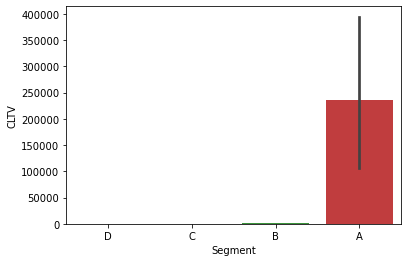

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=df_cltv["Segment"], y= df_cltv["CLTV"])

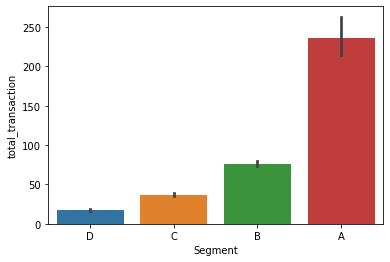

In [37]:
sns.barplot(x=df_cltv["Segment"], y= df_cltv["total_transaction"])

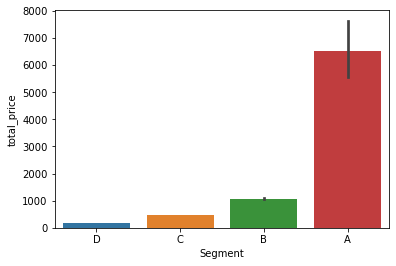

In [38]:
sns.barplot(x=df_cltv["Segment"], y= df_cltv["total_price"])